# Data Cleaning in Python

In [ ]:
"""
Project: Airbnb Open Data – Data Cleaning and Preparation

Data Cleaning Steps:
1. Remove redundant and irrelevant columns
2. Standardize and rename column names
3. Identify and remove duplicate records
4. Clean and standardize individual column values
5. Handle missing values
6. Apply additional data transformations as needed

Dataset Source:
https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata
"""


'f. Check for some more transformation'

# Insert Dataset

In [2]:
import pandas as pd

In [3]:
# Meng Import dataset-csv
data = pd.read_csv("Airbnb_Open_Data.csv")

/tmp/ipython-input-2090012135.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Airbnb_Open_Data.csv")


In [4]:
# Mengecek 5 data teratas
data.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
# Menampilkan keseluruhan kolom
data.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
# Menampilkan dimensi data
data.shape

(102599, 26)

In [7]:
# untuk mengecek informasi data
# membandingkan nilai yg tidak null terhadap yang null pada tiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# a. Remove redundant and irrelevant columns

In [8]:
data.info()
# lihat pada bagian last_review (perbedaan datanya sangat besar dibandign sebelumnya)
# namun pada kasus ini kita drop dari review_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [9]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [10]:
columns_to_keep = ['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review']
columns_to_drop = ['reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license','id']

In [11]:
# Menghitung jumlah kolom
len(columns_to_keep)

19

In [12]:
# Menghitung jumlah kolom
len(columns_to_drop)

7

1. Filtering Data (First Method) - (Buat variabel tiap kali mau edit dataset)

In [13]:
# menampilkan data sesuai variabel kolom
# tampilan hanya menampilkan query terakhir
data[columns_to_keep]
data[columns_to_drop]

,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,id
0,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,1001254
1,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,1002102
2,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,1002403
3,4.64,4.0,1.0,322.0,NaN,NaN,1002755
4,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,1003689
...,...,...,...,...,...,...,...
102594,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN,6092437
102595,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN,6092990
102596,NaN,5.0,1.0,342.0,NaN,NaN,6093542
102597,0.10,3.0,1.0,386.0,NaN,NaN,6094094


In [14]:
dk = data[columns_to_keep]
dd = data[columns_to_drop]

In [15]:
# drop kolom
data_DC1 = data.drop(columns = ['license']) # cara ke-1
data_DC = data.drop(columns = dd) # drop dari variabel data_DC
data_DC.head(2) # total jadi 19 kolom
data_DC.shape # cek dimensi

(102599, 19)

2. Dropping Column (Second Method)- (Tanpa buat variabel tiap kali mau edit dataset)

In [16]:
data.head(1) # kolum di data masih full
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [17]:
data.drop(columns = dd,inplace = True) # drop langsung ke data aslinya, tanpa buat variabel baru
data # data asli yg udah di drop

# Note: kl udah di drop gak bisa di drop lagi (Error)

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN
102595,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015


# b. Standardize and rename column names

In [18]:
# dalam merename column, menggunakan dictionary
data.columns

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review'],
      dtype='object')

In [19]:
# merename kolom NAME
data.rename(columns = {"NAME":"Name"})
data.rename(columns = {"NAME":"Name"}, inplace = True) # mengubah data utama
data.head(2) # sudah keubah

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022


In [20]:
for i in data.columns:
  print(i.upper()) # buat semua kolom kapital

for i in data.columns:
  print(i.lower ()) # buat semua lower

NAME
HOST ID
HOST_IDENTITY_VERIFIED
HOST NAME
NEIGHBOURHOOD GROUP
NEIGHBOURHOOD
LAT
LONG
COUNTRY
COUNTRY CODE
INSTANT_BOOKABLE
CANCELLATION_POLICY
ROOM TYPE
CONSTRUCTION YEAR
PRICE
SERVICE FEE
MINIMUM NIGHTS
NUMBER OF REVIEWS
LAST REVIEW
name
host id
host_identity_verified
host name
neighbourhood group
neighbourhood
lat
long
country
country code
instant_bookable
cancellation_policy
room type
construction year
price
service fee
minimum nights
number of reviews
last review


In [21]:
New_CN_L = [] # untuk menampung list kolom baru (Kecil)
for i in data.columns:
 New_CN_L.append(i.lower ()) # buat semua lower

In [22]:
 New_CN_L # menampilkan semua kolom lower

['name',
 'host id',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'construction year',
 'price',
 'service fee',
 'minimum nights',
 'number of reviews',
 'last review']

In [23]:
data_cl = data.copy() # copy dari data utama, untuk coba ganti kolom ke lower

In [24]:
data_cl.columns = New_CN_L # ubah kolom yg awalnya H.bsar jadi kecil

In [25]:
data_cl.head(2) # nama kolom udah kecil semua

,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022


# c. Identify and remove duplicate records

In [26]:
data.duplicated() # kl duplicate True
data.duplicated().sum() # menghitung jumlah Duplicate True
data.duplicated().value_counts() # menghitung jumlah Duplicate True dan False

,count
False,102058
True,541


In [27]:
# clean_data = data.drop_duplicates() # buat variabel
# atau
# aku pilh yg bawah
data.drop_duplicates(inplace = True) # langsung ganti ke data utama

In [28]:
data.duplicated().value_counts() # udah gak ada data duplicate

,count
False,102058


# d. Clean and standardize individual column values

In [30]:
data.isna().sum() # last review merupakan kolom dengan NA terbanyak

,0
Name,250
host id,0
host_identity_verified,289
host name,404
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532
country code,131


In [31]:
data.drop(columns = "last review" )

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,NaN,$696,NaN,7.0,12.0
102054,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,$909,NaN,1.0,19.0
102055,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,$387,NaN,2.0,50.0
102056,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,$848,NaN,2.0,0.0


In [32]:
# data_no_NA = data bersih tanpa NA
data_no_NA = data.dropna()

In [33]:
# ngecek lagi
data_no_NA.isna().sum() # udah gak ada data yang NA

,0
Name,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0
country code,0


# e. Handle missing values from the dataset

1. Mengubah host_identity_verified jadi UPPER

In [34]:
# dari sini pake variabel data_no_NA
data_no_NA['host_identity_verified']

,host_identity_verified
0,unconfirmed
1,verified
4,verified
5,verified
7,unconfirmed
...,...
102029,unconfirmed
102030,verified
102031,verified
102032,unconfirmed


In [35]:
# Mengubah hasil host_identity_verified jadi uppercase
data_no_NA['host_identity_verified'].str.upper()

,host_identity_verified
0,UNCONFIRMED
1,VERIFIED
4,VERIFIED
5,VERIFIED
7,UNCONFIRMED
...,...
102029,UNCONFIRMED
102030,VERIFIED
102031,VERIFIED
102032,UNCONFIRMED


In [36]:
data_no_NA.head(2) # belum berubah

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022


In [37]:
# cara mengubah hasilnya di data_no_NA
data_no_NA['host_identity_verified'] = data_no_NA['host_identity_verified'].str.upper()

/tmp/ipython-input-4056827752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_NA['host_identity_verified'] = data_no_NA['host_identity_verified'].str.upper()


In [38]:
data_no_NA.head(2) # udah berubah hasil di 'host_identity_verified'

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022


2. Mengubah instant_bookable jadi bolean (0 atau 1)

In [39]:
data_no_NA ['instant_bookable'].apply(lambda x: 1 if x == True else 0)

,instant_bookable
0,0
1,0
4,0
5,1
7,0
...,...
102029,0
102030,1
102031,1
102032,0


In [40]:
data_no_NA.head(2)

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022


In [41]:
data_no_NA ['instant_bookable'] = data_no_NA ['instant_bookable'].apply(lambda x: 1 if x == True else 0) # df(kolom) = df(kolom).method()

/tmp/ipython-input-4293426264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_NA ['instant_bookable'] = data_no_NA ['instant_bookable'].apply(lambda x: 1 if x == True else 0) # df(kolom) = df(kolom).method()


In [42]:
data_no_NA.head(5) # udah keubah (Done)

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019
7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,10/5/2017


# f. Check for some more transformation

**1. Cek index atau penomerannya udah bener belum**

In [43]:
data_no_NA['instant_bookable'][5] # ada nilainya satu

np.int64(1)

In [44]:
data_no_NA['instant_bookable'][15] # ini error gak ada nilainya, alasan nomer data lompat2

KeyError: 15

In [45]:
# cek data
data_no_NA.head(5) # nomor data lompat2

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019
7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,10/5/2017


In [46]:
#solusi reset index
data_no_NA.reset_index(inplace = True)

In [47]:
# cek lagi
data_no_NA.head(5) # index yang benar udah muncul

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,10/5/2017


In [48]:
# Terakhir coba lagi yg data no 15
data_no_NA['instant_bookable'][15] # udah gak error

np.int64(1)

**2. Ganti mata uang yg awalnya string jadi int dan menghilangkan spaci berlebih**

a. Data Cleaning

In [49]:
data_no_NA.head(3) # pada price masih ada $, spasi berlebih, sama koma

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018


In [50]:
type (data_no_NA['price'][2]) # data type masih string

str

In [51]:
data_no_NA.info() # dtype object- belum tentu string, bisa jadi campuran int, string, float, dll (cek lagi)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83969 entries, 0 to 83968
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   83969 non-null  int64  
 1   Name                    83969 non-null  object 
 2   host id                 83969 non-null  int64  
 3   host_identity_verified  83969 non-null  object 
 4   host name               83969 non-null  object 
 5   neighbourhood group     83969 non-null  object 
 6   neighbourhood           83969 non-null  object 
 7   lat                     83969 non-null  float64
 8   long                    83969 non-null  float64
 9   country                 83969 non-null  object 
 10  country code            83969 non-null  object 
 11  instant_bookable        83969 non-null  int64  
 12  cancellation_policy     83969 non-null  object 
 13  room type               83969 non-null  object 
 14  Construction year       83969 non-null

In [52]:
data_no_NA['price'].head(10) # buat cek jenis datanya dari perhitungan di bawah 🤑🤑
# 1. Dolar udah ilang

,price
0,$966
1,$142
2,$204
3,$577
4,"$1,060"
5,"$1,018"
6,$291
7,$319
8,$606
9,$580


In [53]:
# 1. menghilangkan dolar
from numpy._core.defchararray import replace
data_no_NA ['price'] = data_no_NA['price'].str.replace('$','')

/tmp/ipython-input-1481107057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_NA ['price'] = data_no_NA['price'].str.replace('$','')


In [54]:
# 2. menghilangkang koma
data_no_NA ['price'] = data_no_NA['price'].str.replace(',','')

/tmp/ipython-input-903435079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_NA ['price'] = data_no_NA['price'].str.replace(',','')


In [55]:
# 2. menghilangkang koma
data_no_NA ['price'] = data_no_NA['price'].str.replace(',','')

/tmp/ipython-input-903435079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_NA ['price'] = data_no_NA['price'].str.replace(',','')


In [56]:
# 3. menghilangkang spasi gak jelas
data_no_NA ['price'] = data_no_NA['price'].str.replace(' ','')

/tmp/ipython-input-1264980915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_NA ['price'] = data_no_NA['price'].str.replace(' ','')


b. Ganti mata uang menjadi string

In [57]:
# mengganti data type
data_no_NA['price'] = data_no_NA['price'].astype(int)

/tmp/ipython-input-3695434335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_NA['price'] = data_no_NA['price'].astype(int)


In [58]:
# mengecek kembali
type (data_no_NA['price'][100])
type (data_no_NA['price'][5]) # udah bener integer

numpy.int64

# Ekspor file yang udah di Cleaning


In [59]:
# ekspor data dari dataframe ke CSV
data_no_NA.to_csv('Cleaned_Data.csv')

In [76]:
data_no_NA.to_excel('Cleaned_Data.xlsx', index=False)


# Simple Data Analysis

1. Identified listing concentration across neighbourhood groups.

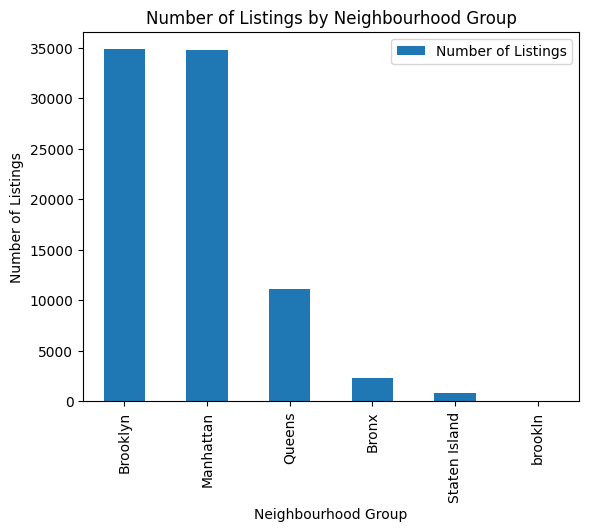

In [68]:
neigh_count = data_no_NA['neighbourhood group'].value_counts()

plt.figure()
neigh_count.plot(kind='bar', label='Number of Listings')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.legend()
plt.show()



Distribusi listing di setiap neighbourhood group menunjukkan bahwa pasokan Airbnb tidak tersebar secara merata. Beberapa area memiliki jumlah listing yang jauh lebih tinggi dibandingkan area lainnya, yang mengindikasikan tingkat persaingan pasar dan konsentrasi permintaan yang lebih besar di wilayah tersebut.

2. Apakah minimum nights berpengaruh ke harga

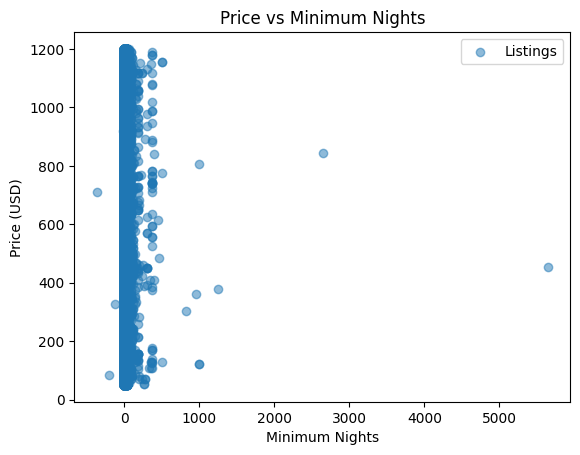

In [69]:
plt.figure()
plt.scatter(
    data_no_NA['minimum nights'],
    data_no_NA['price'],
    label='Listings',
    alpha=0.5
)
plt.title('Price vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



Hasil visualisasi menunjukkan tidak terdapat hubungan linear yang kuat antara jumlah minimum malam menginap (minimum nights) dan harga listing. Listing dengan harga tinggi dapat ditemukan pada berbagai ketentuan minimum menginap, yang mengindikasikan bahwa penetapan harga tidak terutama dipengaruhi oleh minimum nights, melainkan oleh faktor lain seperti lokasi, tipe kamar, dan fasilitas.

3. Price Distribution by Neighbourhood Group

<Figure size 640x480 with 0 Axes>

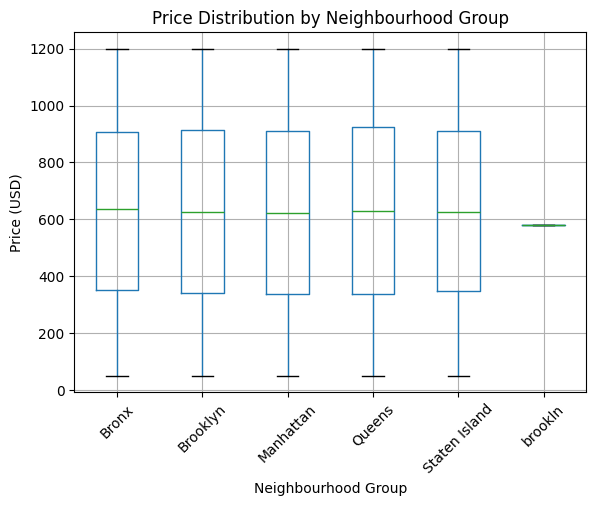

In [70]:
import matplotlib.pyplot as plt

plt.figure()
data_no_NA.boxplot(
    column='price',
    by='neighbourhood group',
    rot=45
)
plt.title('Price Distribution by Neighbourhood Group')
plt.suptitle('')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (USD)')
plt.show()


Distribusi harga bervariasi antar neighbourhood group, di mana beberapa area menunjukkan harga median yang lebih tinggi serta rentang harga yang lebih luas. Hal ini mencerminkan adanya perbedaan tingkat permintaan pasar dan karakteristik listing di setiap wilayah.

4. Number of Reviews vs Price

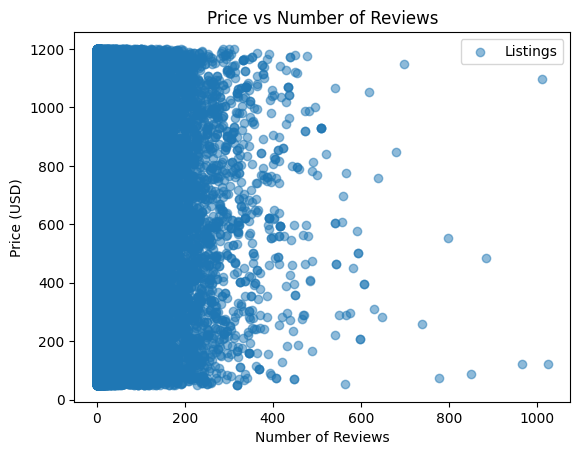

In [71]:
plt.figure()
plt.scatter(
    data_no_NA['number of reviews'],
    data_no_NA['price'],
    alpha=0.5,
    label='Listings'
)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Visualisasi menunjukkan tidak adanya korelasi yang kuat antara harga listing dan jumlah ulasan (number of reviews). Hal ini menunjukkan bahwa harga yang lebih tinggi tidak selalu berbanding lurus dengan volume pemesanan, sehingga popularitas listing kemungkinan dipengaruhi oleh faktor lain selain harga.

#